In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# read dataset
dataset = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
dataset.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [4]:
#dataset.columns

In [5]:
#print(dataset.date.dtype)
# There is no data for 16-08-2018 so ingore this month
#sub_dataset = dataset[(dataset['date'] >= '2018-09-01')]
#sub_dataset = dataset

In [6]:
# drop irrelevant columns

df = dataset.drop(['status', 'card_present_flag', 'bpay_biller_code', 'account', 'currency', 'merchant_id',
                   'merchant_code', 'first_name', 'date', 'merchant_suburb', 'merchant_state', 'extraction', 
                   'transaction_id', 'country', 'merchant_long_lat', 'movement'], axis = 1)

In [7]:
df.head()

,long_lat,txn_description,balance,gender,age,amount,customer_id
0,153.41 -27.95,POS,35.39,F,26,16.25,CUS-2487424745
1,153.41 -27.95,SALES-POS,21.20,F,26,14.19,CUS-2487424745
2,151.23 -33.94,POS,5.71,M,38,6.42,CUS-2142601169
3,153.10 -27.66,SALES-POS,2117.22,F,40,40.90,CUS-1614226872
4,153.41 -27.95,SALES-POS,17.95,F,26,3.25,CUS-2487424745


In [8]:
# check for nulls
df.isnull().sum()

long_lat           0
txn_description    0
balance            0
gender             0
age                0
amount             0
customer_id        0
dtype: int64

Text(0.5, 0, 'Salary payment count')

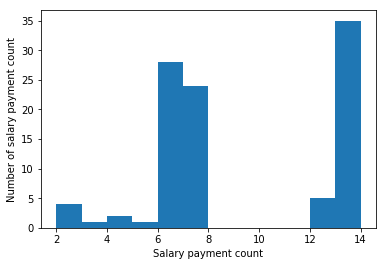

In [9]:
# Count the number of PAY/SALARY for each customer

df_salary = dataset[['customer_id', 'txn_description', 'amount', 'date']]
df_salary = df_salary[(df['txn_description'] == 'PAY/SALARY')]

#df_salary_sort = df_salary.sort_values(by = ['customer_id', 'date'], ascending = False)
#df_salary_sort

df_salary_count = df_salary.pivot_table(index=['customer_id'], aggfunc='size')
type(df_salary_count)
df_count_S = pd.DataFrame(df_salary_count)
df_count_S = df_count_S.reset_index()
df_count_S.rename(columns = {0 :'Salary_Count'}, inplace = True)
#type(df_count)
plt.hist(df_salary_count, bins = 12)
plt.ylabel('Number of salary payment count')
plt.xlabel('Salary payment count')
#df_count

In [10]:
# pivot table to find unique customers and their salary and other kind of transactions
df_CI = pd.pivot_table(df, values = 'amount', 
                     index = ['customer_id', 'age', 'long_lat', 'gender' ],
                     columns = ['txn_description'], aggfunc = np.sum, fill_value = 0)
df_CI.head()

,,,txn_description,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS
customer_id,age,long_lat,gender,,,,,,
CUS-1005756958,53,153.03 -27.51,F,0,12616.11,1296,546,748.01,1062.85
CUS-1117979751,21,115.81 -31.82,M,1001,25050.55,3957,0,606.37,3369.45
CUS-1140341822,28,144.97 -37.42,M,270,11499.06,852,0,1356.47,3033.07
CUS-1147642491,34,151.04 -33.77,F,250,22248.07,2597,0,2062.31,1823.44
CUS-1196156254,34,138.52 -35.01,F,767,27326.11,3017,0,2305.65,2634.96


In [11]:
#df_CI.columns

In [12]:
#df_CI.info()

In [13]:
# Turn Pandas Multi-Index into column
df_CI = df_CI.reset_index()
df_CI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
customer_id    100 non-null object
age            100 non-null int64
long_lat       100 non-null object
gender         100 non-null object
INTER BANK     100 non-null int64
PAY/SALARY     100 non-null float64
PAYMENT        100 non-null int64
PHONE BANK     100 non-null int64
POS            100 non-null float64
SALES-POS      100 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 7.9+ KB


In [14]:
df_CI.head()

txn_description,customer_id,age,long_lat,gender,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS
0,CUS-1005756958,53,153.03 -27.51,F,0,12616.11,1296,546,748.01,1062.85
1,CUS-1117979751,21,115.81 -31.82,M,1001,25050.55,3957,0,606.37,3369.45
2,CUS-1140341822,28,144.97 -37.42,M,270,11499.06,852,0,1356.47,3033.07
3,CUS-1147642491,34,151.04 -33.77,F,250,22248.07,2597,0,2062.31,1823.44
4,CUS-1196156254,34,138.52 -35.01,F,767,27326.11,3017,0,2305.65,2634.96


In [15]:
# Add Salary Count to dataset
df_CI_S = df_CI.merge(df_count_S, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')
df_CI_S.head()

,customer_id,age,long_lat,gender,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,Salary_Count
0,CUS-1005756958,53,153.03 -27.51,F,0,12616.11,1296,546,748.01,1062.85,13
1,CUS-1117979751,21,115.81 -31.82,M,1001,25050.55,3957,0,606.37,3369.45,7
2,CUS-1140341822,28,144.97 -37.42,M,270,11499.06,852,0,1356.47,3033.07,6
3,CUS-1147642491,34,151.04 -33.77,F,250,22248.07,2597,0,2062.31,1823.44,13
4,CUS-1196156254,34,138.52 -35.01,F,767,27326.11,3017,0,2305.65,2634.96,7


In [16]:
# Calculate annual salary
# if Salary_Count >= 12 then payment is weekly
# if Salary_Count <= 5 then payment is monthly
# if other value then payment is fortnightly


In [17]:
df_CI_S ['Annual_Salary'] = 0
for i in range (0, len(df_CI_S)):
    if int(df_CI_S.Salary_Count[i]) >= 12:
        df_CI_S.Annual_Salary[i] = df_CI_S ['PAY/SALARY'][i]/(df_CI_S.Salary_Count[i]) / 7 * 356
    elif int(df_CI_S.Salary_Count[i]) <= 5:
        df_CI_S.Annual_Salary[i] = df_CI_S ['PAY/SALARY'][i]/(df_CI_S.Salary_Count[i]) * 12
    else:
        df_CI_S.Annual_Salary[i] = df_CI_S ['PAY/SALARY'][i]/(df_CI_S.Salary_Count[i]) / 14 * 356

# all transaction multipy 4 to obtain for one year

df_CI_S [['INTER BANK', 'PAYMENT', 'PHONE BANK', 'POS', 
          'SALES-POS']] =4 * df_CI_S [['INTER BANK','PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS']]

df_CI_S.head()

C:\Users\atefeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\atefeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\atefeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,customer_id,age,long_lat,gender,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,Salary_Count,Annual_Salary
0,CUS-1005756958,53,153.03 -27.51,F,0,12616.11,5184,2184,2992.04,4251.40,13,49355
1,CUS-1117979751,21,115.81 -31.82,M,4004,25050.55,15828,0,2425.48,13477.80,7,90999
2,CUS-1140341822,28,144.97 -37.42,M,1080,11499.06,3408,0,5425.88,12132.28,6,48734
3,CUS-1147642491,34,151.04 -33.77,F,1000,22248.07,10388,0,8249.24,7293.76,13,87036
4,CUS-1196156254,34,138.52 -35.01,F,3068,27326.11,12068,0,9222.60,10539.84,7,99266


In [18]:
# find the initial balance of each customer
df_B = dataset[['customer_id','balance']]
df_CI_B = df_B.drop_duplicates(subset = ['customer_id'], keep = 'first')


# merge with previous dataframe
df_S_B = df_CI_S.merge(df_CI_B , left_on = 'customer_id', right_on = 'customer_id', how = 'inner')

# adding a column for total spend
df_S_B['total spend'] = df_S_B['INTER BANK']+ df_S_B['PAYMENT']+ df_S_B['PHONE BANK']+ df_S_B['POS']+ df_S_B['SALES-POS']

df_S_B.head()



,customer_id,age,long_lat,gender,INTER BANK,PAY/SALARY,PAYMENT,PHONE BANK,POS,SALES-POS,Salary_Count,Annual_Salary,balance,total spend
0,CUS-1005756958,53,153.03 -27.51,F,0,12616.11,5184,2184,2992.04,4251.40,13,49355,463.96,14611.44
1,CUS-1117979751,21,115.81 -31.82,M,4004,25050.55,15828,0,2425.48,13477.80,7,90999,2335.35,35735.28
2,CUS-1140341822,28,144.97 -37.42,M,1080,11499.06,3408,0,5425.88,12132.28,6,48734,823.53,22046.16
3,CUS-1147642491,34,151.04 -33.77,F,1000,22248.07,10388,0,8249.24,7293.76,13,87036,1726.28,26931.00
4,CUS-1196156254,34,138.52 -35.01,F,3068,27326.11,12068,0,9222.60,10539.84,7,99266,12529.59,34898.44


In [19]:
# find state of each customer base on longitude and latitude information
"""
df_S_B[['long', 'lat']] = df_S_B.long_lat.str.split(' ', expand = True)
df_S_B['lat_long'] = df_S_B['lat'].map(str) + ',' + df_S_B['long'].map(str)

import geopy
from geopy.geocoders import Nominatim
def LoctoState(LOC):
    locator = Nominatim(user_agent="myGeocoder")
    coordinates = LOC
    location = locator.reverse(coordinates, exactly_one = True, timeout = 10)
    address = location.raw['address']
    state = address.get('state')
    return state
#print (LoctoState( "-27.51,153.03"))

df_S_B['state'] = ''
for i in range (0, len(df_S_B)):
    df_S_B['state'][i] = LoctoState(df_S_B['lat_long'][i])
    
df_S_B.head()
"""

'\ndf_S_B[[\'long\', \'lat\']] = df_S_B.long_lat.str.split(\' \', expand = True)\ndf_S_B[\'lat_long\'] = df_S_B[\'lat\'].map(str) + \',\' + df_S_B[\'long\'].map(str)\n\nimport geopy\nfrom geopy.geocoders import Nominatim\ndef LoctoState(LOC):\n    locator = Nominatim(user_agent="myGeocoder")\n    coordinates = LOC\n    location = locator.reverse(coordinates, exactly_one = True, timeout = 10)\n    address = location.raw[\'address\']\n    state = address.get(\'state\')\n    return state\n#print (LoctoState( "-27.51,153.03"))\n\ndf_S_B[\'state\'] = \'\'\nfor i in range (0, len(df_S_B)):\n    df_S_B[\'state\'][i] = LoctoState(df_S_B[\'lat_long\'][i])\n    \ndf_S_B.head()\n'

In [20]:

df_F = df_S_B.drop(['customer_id', 'long_lat', 'PAY/SALARY', 'Salary_Count'], axis = 1)
df_F.head()

,age,gender,INTER BANK,PAYMENT,PHONE BANK,POS,SALES-POS,Annual_Salary,balance,total spend
0,53,F,0,5184,2184,2992.04,4251.40,49355,463.96,14611.44
1,21,M,4004,15828,0,2425.48,13477.80,90999,2335.35,35735.28
2,28,M,1080,3408,0,5425.88,12132.28,48734,823.53,22046.16
3,34,F,1000,10388,0,8249.24,7293.76,87036,1726.28,26931.00
4,34,F,3068,12068,0,9222.60,10539.84,99266,12529.59,34898.44


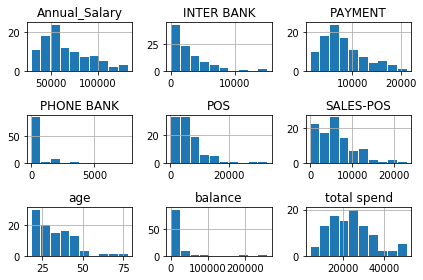

In [21]:
# Histogram of Data visulisation 
df_F.hist(rwidth = 0.9)
plt.tight_layout()

Text(0, 0.5, 'Annual_Salary')

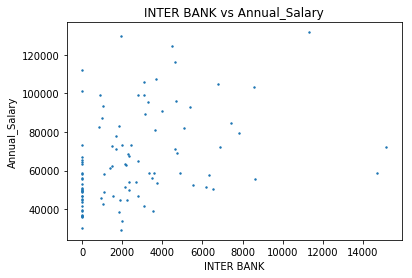

In [22]:
# Data visulisation 
# Visualise the continuous features vs PAY/SALARY
#plt.subplot(8,1,1)
plt.title('INTER BANK vs Annual_Salary')
plt.scatter(df_F['INTER BANK'], df_F['Annual_Salary'], s = 2)
plt.xlabel('INTER BANK')
plt.ylabel('Annual_Salary')

#plt.tight_layout()

Text(0, 0.5, 'Annual_Salary')

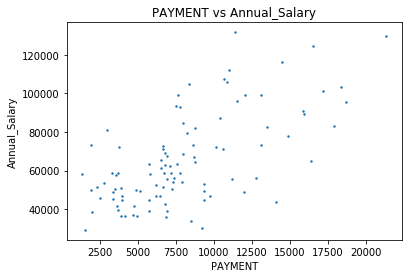

In [23]:
#plt.subplot(8,1,2)
plt.title('PAYMENT vs Annual_Salary')
plt.scatter(df_F['PAYMENT'], df_F['Annual_Salary'], s = 2)
plt.xlabel('PAYMENT')
plt.ylabel('Annual_Salary')

Text(0, 0.5, 'Annual_Salary')

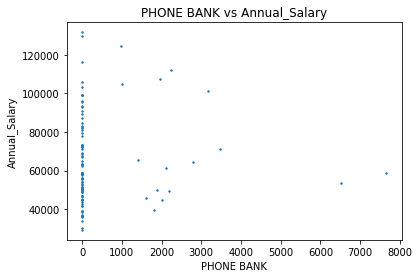

In [24]:
#plt.subplot(8,1,3)
plt.title('PHONE BANK vs Annual_Salary')
plt.scatter(df_F['PHONE BANK'], df_F['Annual_Salary'], s = 2)
plt.xlabel('PHONE BANK')
plt.ylabel('Annual_Salary')

Text(0, 0.5, 'Annual_Salary')

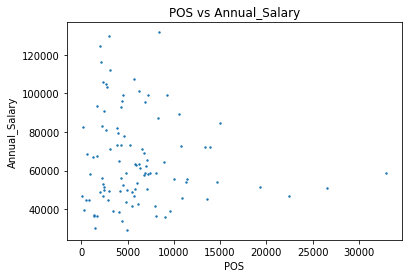

In [25]:
#plt.subplot(8,1,4)
plt.title('POS vs Annual_Salary')
plt.scatter(df_F['POS'], df_F['Annual_Salary'], s = 2)
plt.xlabel('POS')
plt.ylabel('Annual_Salary')

Text(0, 0.5, 'Annual_Salary')

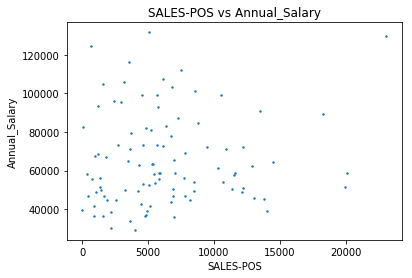

In [26]:
#plt.subplot(8,1,5)
plt.title('SALES-POS vs Annual_Salary')
plt.scatter(df_F['SALES-POS'], df_F['Annual_Salary'], s = 2)
plt.xlabel('SALES-POS')
plt.ylabel('Annual_Salary')

Text(0, 0.5, 'Annual_Salary')

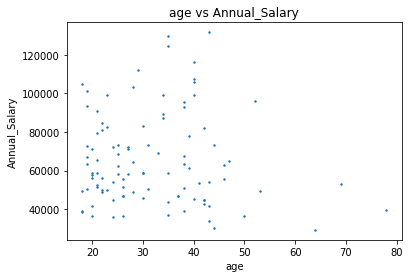

In [27]:
#plt.subplot(8,1,6)
plt.title('age vs Annual_Salary')
plt.scatter(df_F['age'], df_F['Annual_Salary'], s = 2)
plt.xlabel('age')
plt.ylabel('Annual_Salary')

Text(0, 0.5, 'Annual_Salary')

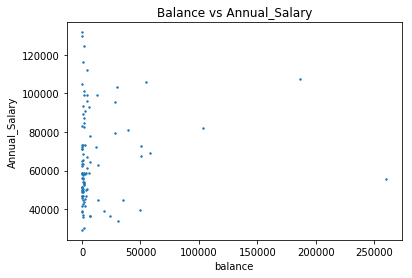

In [28]:
#plt.subplot(8,1,7)
plt.title('Balance vs Annual_Salary')
plt.scatter(df_F['balance'], df_F['Annual_Salary'], s = 2)
plt.xlabel('balance')
plt.ylabel('Annual_Salary')

Text(0, 0.5, 'Annual_Salary')

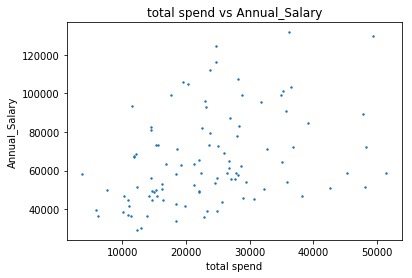

In [29]:
#plt.subplot(8,1,8)
plt.title('total spend vs Annual_Salary')
plt.scatter(df_F['total spend'], df_F['Annual_Salary'], s = 2)
plt.xlabel('total spend')
plt.ylabel('Annual_Salary')

<BarContainer object of 2 artists>

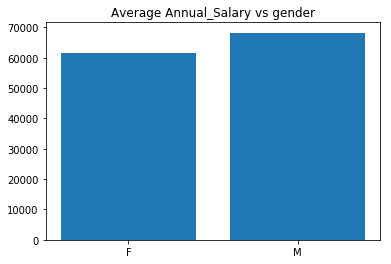

In [30]:
# Data visulisation 
# Visualise the categorical feature vs PAY/SALARY

cat_list = df_F['gender'].unique()
cat_average = df_F.groupby('gender')['Annual_Salary'].mean()
#cat_average = df_F.groupby('gender').mean()['Annual_Salary']
plt.title('Average Annual_Salary vs gender')
plt.bar(cat_list, cat_average)


In [31]:
# Check for outlier
df_F['Annual_Salary'].describe()
#df_F['Annual_Salary'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

count       100.000000
mean      65352.270000
std       23633.324404
min       29293.000000
25%       48267.500000
50%       58803.000000
75%       79821.250000
max      131618.000000
Name: Annual_Salary, dtype: float64

In [32]:
# Check linearity using correlation coeficient matrix
correlation = df_F[['Annual_Salary', 'age', 'INTER BANK', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS',
                   'balance', 'total spend']].corr()
print(correlation)

               Annual_Salary       age  INTER BANK   PAYMENT  PHONE BANK  \
Annual_Salary       1.000000 -0.061377    0.352362  0.639631    0.033414   
age                -0.061377  1.000000   -0.099233  0.026884    0.103961   
INTER BANK          0.352362 -0.099233    1.000000  0.087386   -0.081680   
PAYMENT             0.639631  0.026884    0.087386  1.000000   -0.132095   
PHONE BANK          0.033414  0.103961   -0.081680 -0.132095    1.000000   
POS                -0.086938 -0.036929    0.181437 -0.123618   -0.052313   
SALES-POS           0.100400 -0.139284    0.158792  0.121610    0.007496   
balance             0.110321  0.237992    0.211241  0.018268    0.026537   
total spend         0.371378 -0.086176    0.476295  0.416710    0.015633   

                    POS  SALES-POS   balance  total spend  
Annual_Salary -0.086938   0.100400  0.110321     0.371378  
age           -0.036929  -0.139284  0.237992    -0.086176  
INTER BANK     0.181437   0.158792  0.211241     0.476295  

In [33]:
# Drop irrelevant features
df_ss = df_F.drop([ 'age','PHONE BANK','POS'], axis = 1)
df_ss.head()

,gender,INTER BANK,PAYMENT,SALES-POS,Annual_Salary,balance,total spend
0,F,0,5184,4251.40,49355,463.96,14611.44
1,M,4004,15828,13477.80,90999,2335.35,35735.28
2,M,1080,3408,12132.28,48734,823.53,22046.16
3,F,1000,10388,7293.76,87036,1726.28,26931.00
4,F,3068,12068,10539.84,99266,12529.59,34898.44


In [34]:
# Create dummy variable
df_ss['gender'].dtype
df_sm = pd.get_dummies(df_ss, drop_first = True)
#df_sm = df_ss

In [35]:
# Normalise the data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
df_sm['INTER BANK'] = scaler.fit_transform(df_sm[['INTER BANK']])
df_sm['PAYMENT'] = scaler.fit_transform(df_sm[['PAYMENT']])
df_sm['SALES-POS'] = scaler.fit_transform(df_sm[['SALES-POS']])
df_sm['balance'] = scaler.fit_transform(df_sm[['balance']])
df_sm['total spend'] = scaler.fit_transform(df_sm[['total spend']])
df_sm['Annual_Salary'] = scaler.fit_transform(df_sm[['Annual_Salary']])


C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to 

In [36]:

# Split into train and test
from sklearn.model_selection import train_test_split

X = df_sm.drop(['Annual_Salary'], axis = 1)
Y = df_sm[['Annual_Salary']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234) 


# Linear Regression

In [37]:
# Fit and score the model
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_Predicted = LR.predict(X_test)

score_train = LR.score(X_train, Y_train)
score_test = LR.score(X_test, Y_test)
#r2_score = r2_score(Y_test, Y_Predicted)
RMSE = math.sqrt(mean_squared_error(Y_test, Y_Predicted)) 


print('r2 score for Linear Regression is:' ,score_test)
print('RMSE for Linear Regression is:' ,RMSE)


r2 score for Linear Regression is: 0.5763367529452759
RMSE for Linear Regression is: 0.6476652932203193


In [38]:
# cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, X_train, Y_train, scoring='r2', cv=5)
scores 

array([ 0.2288959 , -0.13826055,  0.34843882,  0.44948336, -0.89811154])

In [39]:
# KFold
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(LR, X_train, Y_train, scoring='r2', cv=folds)
scores 

array([ 0.2989966 ,  0.64696935,  0.57678064, -0.17722345, -0.11800458])

# Feature Selection

In [40]:
# feature selection
from sklearn.feature_selection import f_regression
result = f_regression(X,Y)
f_score = result [0]
p_value = result [1]

columns = list(X.columns)
print("  Feature  ", "         F_score  " , "         P_value  ")
print("  -------           -------            ------- ")
for i in range(0, len(columns)):
    f1=  f_score[i]
    p1=  p_value[i]
    print(" ", columns[i].ljust(10),"   " , f1, "  ", p1)

  Feature            F_score            P_value  
  -------           -------            ------- 
  INTER BANK     13.892456810874593    0.00032395470010236047
  PAYMENT        67.85635791948742    7.878230949637538e-13
  SALES-POS      0.997918573516517    0.32027489509276974
  balance        1.2074184722859997    0.2745362021940989
  total spend     15.678767795365692    0.00014233394008753423
  gender_M       1.9135367414106539    0.16971417787004986


C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Linear Regression after FS

In [41]:
# Drop irrelevant features
df_ss = df_F.drop([ 'age','PHONE BANK','POS', 'balance','SALES-POS'], axis = 1)
df_ss.head()

,gender,INTER BANK,PAYMENT,Annual_Salary,total spend
0,F,0,5184,49355,14611.44
1,M,4004,15828,90999,35735.28
2,M,1080,3408,48734,22046.16
3,F,1000,10388,87036,26931.00
4,F,3068,12068,99266,34898.44


In [42]:
# Create dummy variable
df_ss['gender'].dtype
df_sm = pd.get_dummies(df_ss, drop_first = True)

In [43]:
# Normalise the data 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
df_sm['INTER BANK'] = scaler.fit_transform(df_sm[['INTER BANK']])
df_sm['PAYMENT'] = scaler.fit_transform(df_sm[['PAYMENT']])
df_sm['total spend'] = scaler.fit_transform(df_sm[['total spend']])
df_sm['Annual_Salary'] = scaler.fit_transform(df_sm[['Annual_Salary']])

C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\atefeh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to 

In [44]:

# Split into train and test
from sklearn.model_selection import train_test_split

X = df_sm.drop(['Annual_Salary'], axis = 1)
Y = df_sm[['Annual_Salary']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234) 

In [45]:
# Fit and score the model
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_Predicted = LR.predict(X_test)

score_train = LR.score(X_train, Y_train)
score_test = LR.score(X_test, Y_test)
RMSE = math.sqrt(mean_squared_error(Y_test, Y_Predicted)) 

print('r2 score for Linear Regression is:' ,score_test)
print('RMSE for Linear Regression is:' ,RMSE)

r2 score for Linear Regression is: 0.6173311697006681
RMSE for Linear Regression is: 0.6155336134400503


In [46]:
# cross_val_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR, X_train, Y_train, scoring='r2', cv=5)
scores 

array([ 0.23932364, -0.12905291,  0.44972776,  0.49994856, -0.49757349])

In [47]:
# KFold
from sklearn.model_selection import KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(LR, X_train, Y_train, scoring='r2', cv=folds)
scores 

array([ 0.40019539,  0.68358956,  0.58267536, -0.19175429, -0.09101695])